<a href="https://colab.research.google.com/github/ADRIANVM117/TEC_MTY_PORTAFOLIO/blob/main/prediccion_candidatos_promocion_laboral/DS_C8_SC1_RETO_ADRIANVAZQUEZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Automatic ML - DS_C8_SC1**

---

**Reto: Predicción de candidatos elegibles para promoción laboral**

NOMBRE DEL PARTICIPANTE: <b> Adrián Vázquez Mora  </b>

In [1]:
# Es importante instalar todas las librerías inicialmente, porque pide reiniciar el entorno de ejecución
!pip install ydata_profiling --upgrade
!pip install sweetviz
!pip install pycaret

1.	Descarga el archivo: EmployeePromotion.csv y guarda, en un dataframe (`info`), todos sus registros.

In [2]:
import pandas as pd

In [3]:
# Aquí debes leer el archivo para crear el dataframe info
info = pd.read_csv('0.ytdcvnnbhzn0.aoosypzpwlqEmployeePromotion.csv')

In [5]:
info['gender']

0        f
1        m
2        m
3        m
4        m
        ..
54803    m
54804    f
54805    m
54806    m
54807    m
Name: gender, Length: 54808, dtype: object

2. Realiza un análisis exploratorio de datos con la plataforma de AutoEDA ydata Profiling. En la sección de Overview incluye una pestaña `Dataset` con la descripción del conjunto de datos y tu nombre como autor. En una pestaña `Variables` coloca el significado de las columnas.


In [2]:
from ydata_profiling import ProfileReport

In [7]:
# Genera el reporte con ydata Profiling
info_report = ProfileReport(info,
  dataset={
       'description': 'información de candidatos elegibles para promoción laboral',
       'author': 'Adrián Vázquez Mora'},
  variables={
       'descriptions': {
    "employee_id": "ID único para el empleado",
    "department": "Departamento del empleado (e.g., Analytics, Finance, HR, etc.)",
    "region": "Región de empleo",
    "education": "Nivel educativo (Bachelor's, Below Secondary, Master's & above)",
    "gender": "Género del empleado (f: femenino, m: masculino)",
    "recruitment_channel": "Canal de reclutamiento (other, referred, sourcing)",
    "no_of_trainings": "Número de capacitaciones completadas en el año anterior",
    "age": "Edad del empleado",
    "previous_year_rating": "Calificación del empleado en el año previo",
    "length_of_service": "Años de servicio en la empresa",
    "awards_won?": "¿Ganó algún premio el año previo? (0 = NO, 1 = SÍ)",
    "avg_training_score": "Promedio de las evaluaciones de formación actuales",
    "is_promoted": "¿Fue promovido? (0 = NO, 1 = SÍ)"}},
  interactions=None,
  correlations=None)

info_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:01<00:00,  6.74it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

3. Con la plataforma SweetViz divide el conjunto utilizando la variable `gender` como booleana para comparar las características de los subconjuntos resultantes.

In [6]:
!pip install numpy==1.24.
import sweetviz as sv

ERROR: Invalid requirement: 'numpy==1.24.': Expected end or semicolon (after version specifier)
    numpy==1.24.
         ~~~~~~^


                                             |          | [  0%]   00:00 -> (? left)


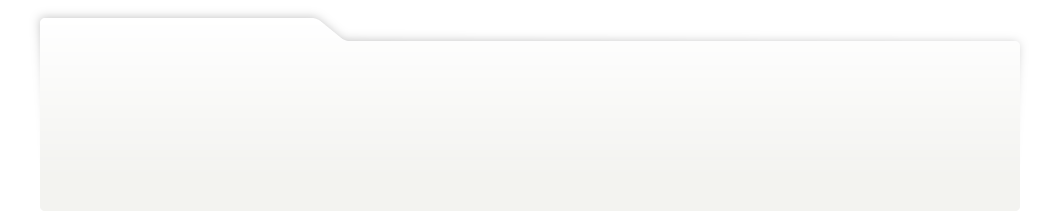
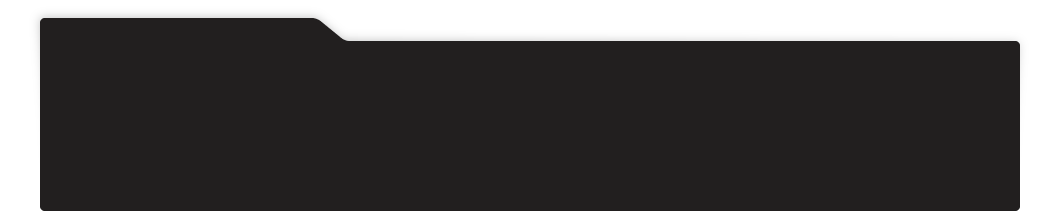
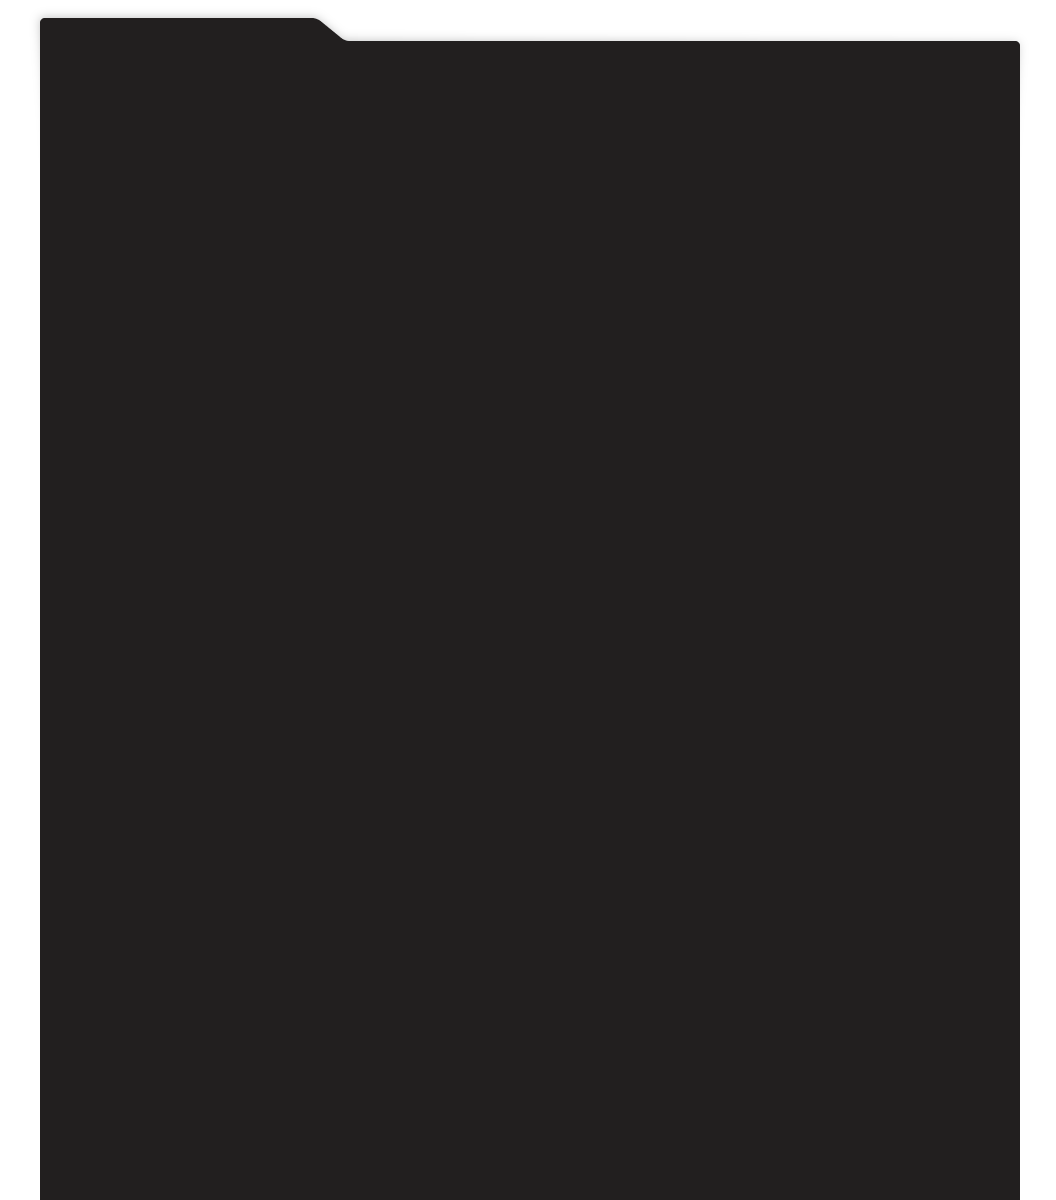
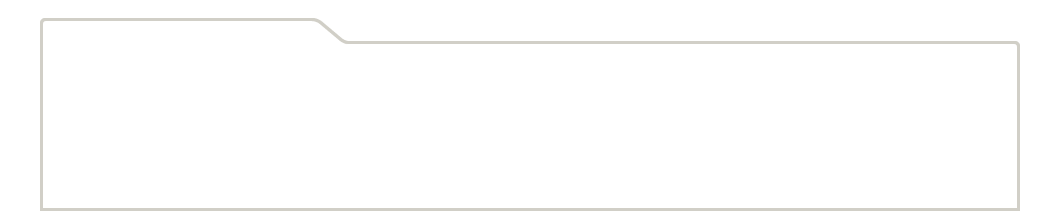
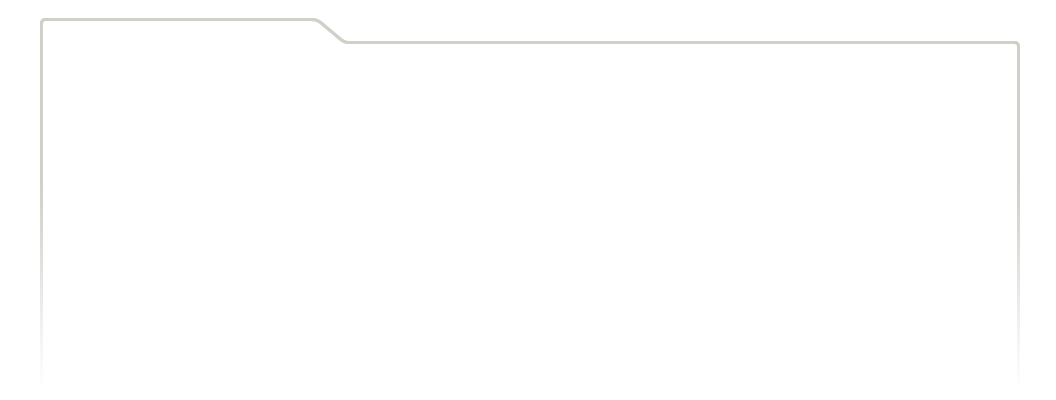
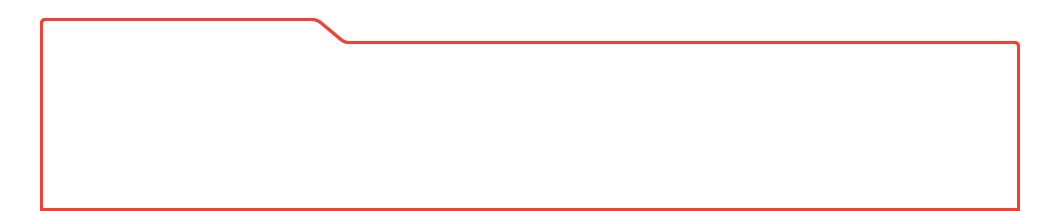
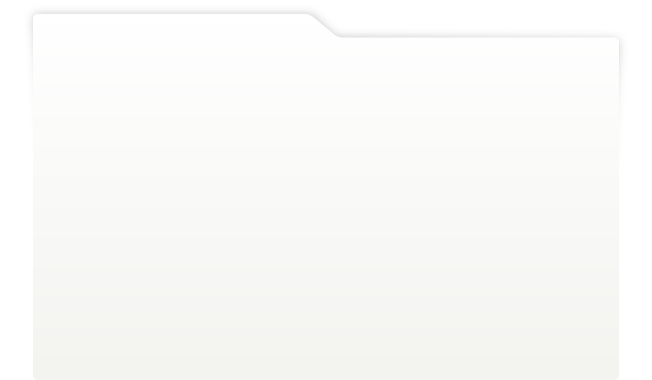
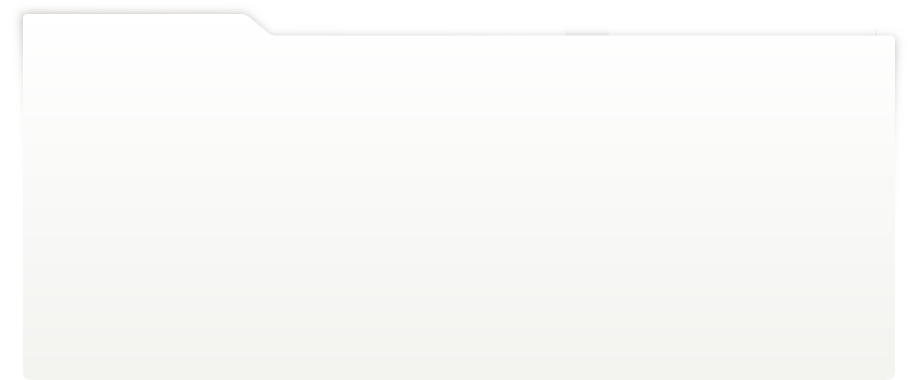
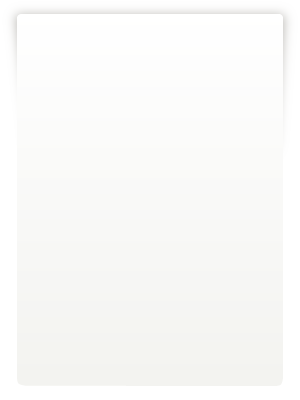
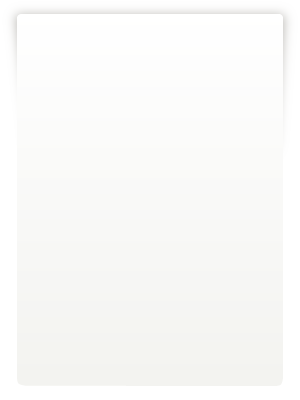
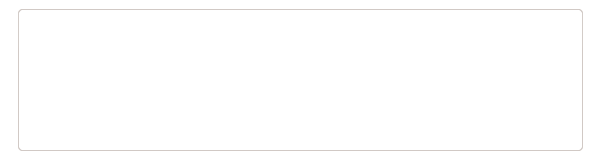
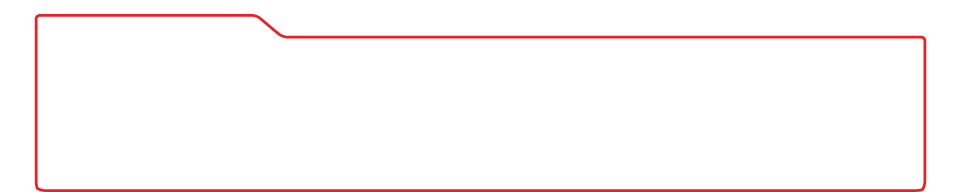
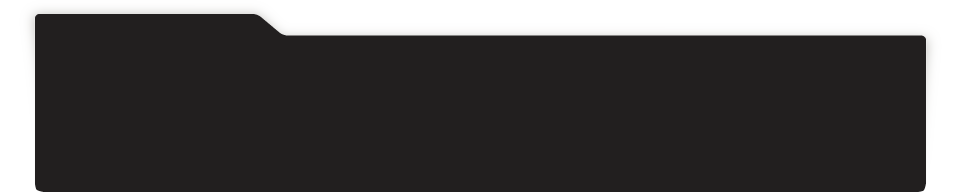
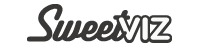
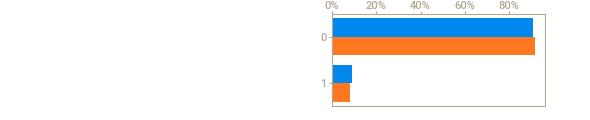
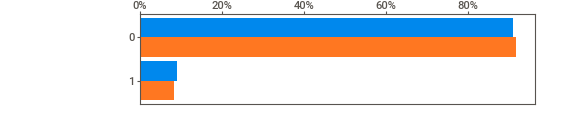
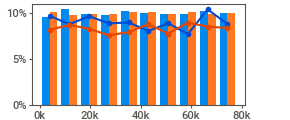
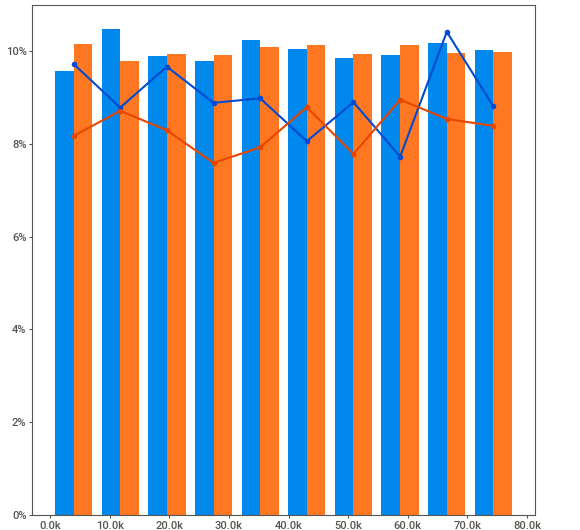
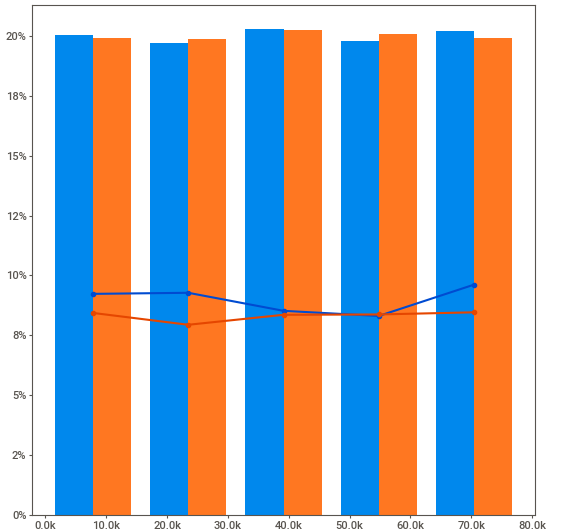
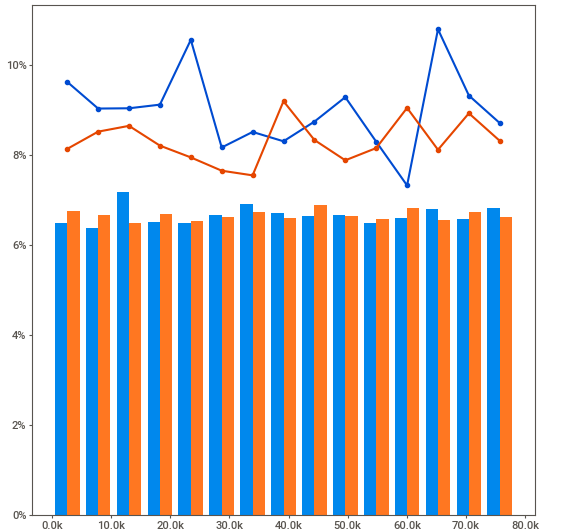
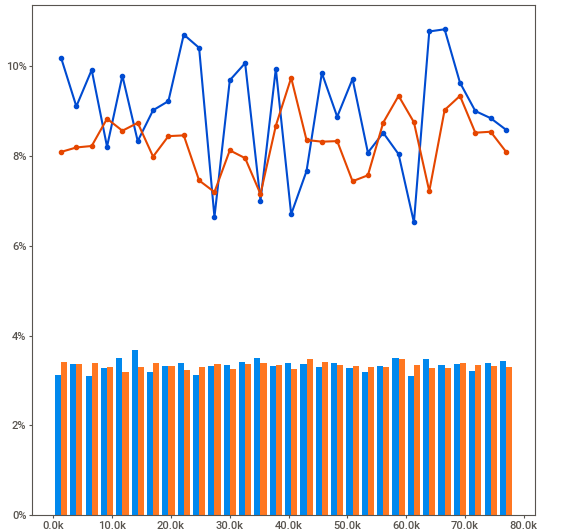
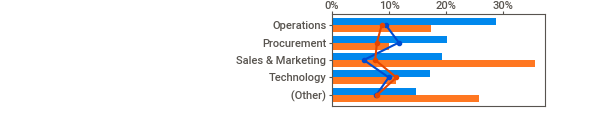
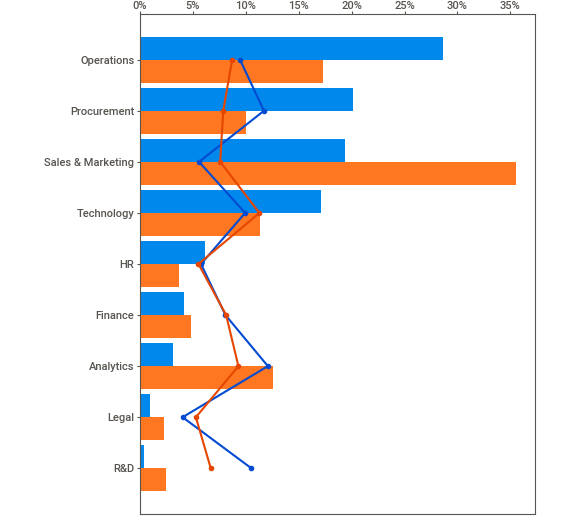
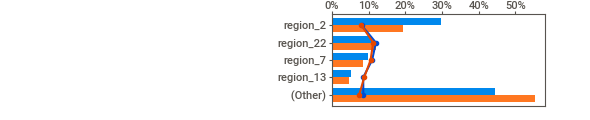
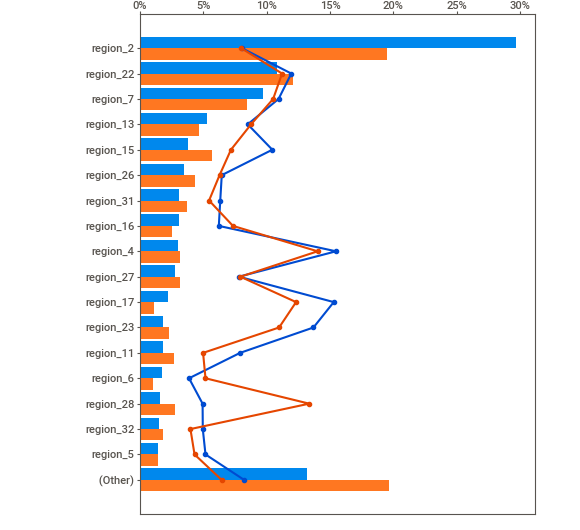
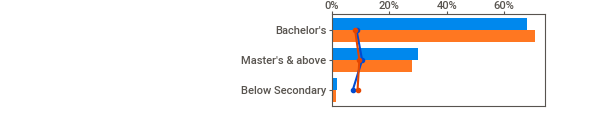
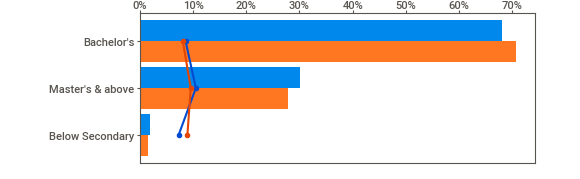
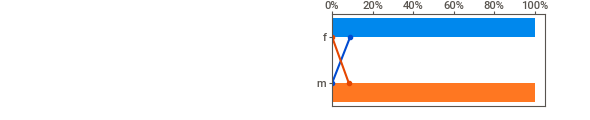
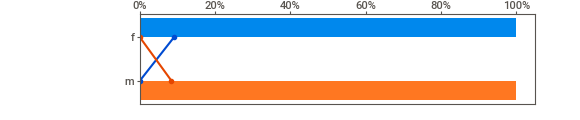
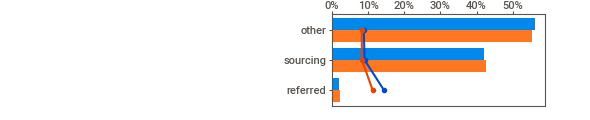
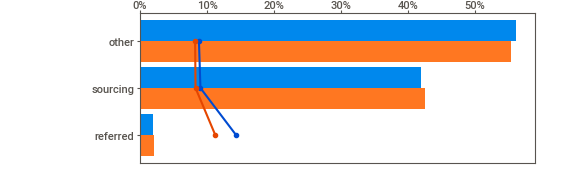
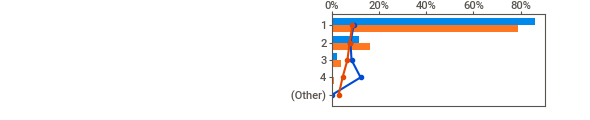
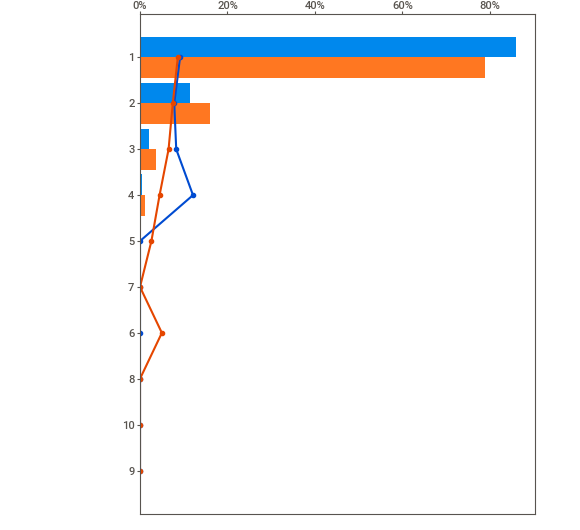
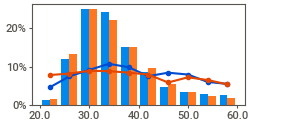
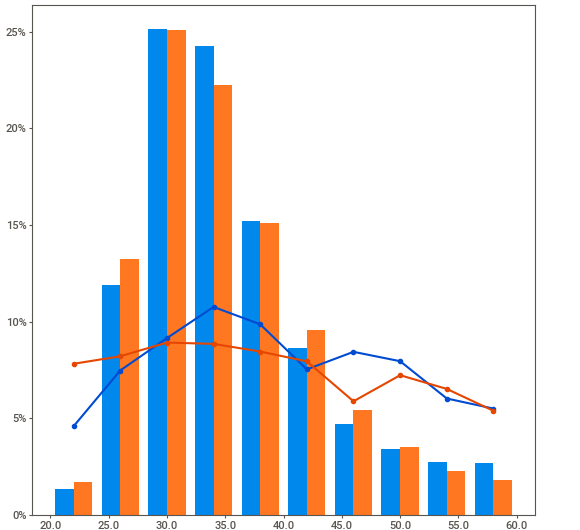
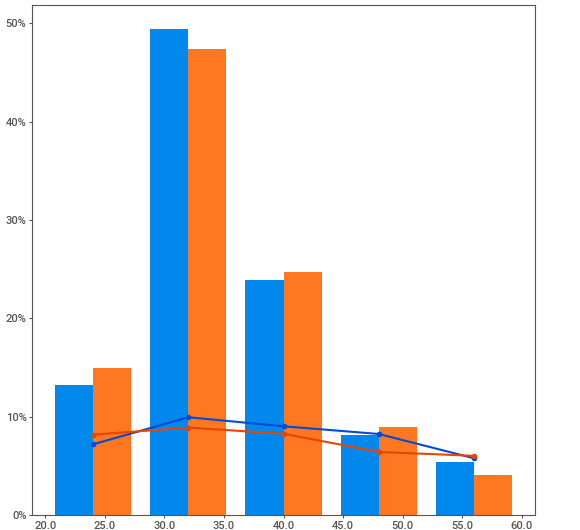
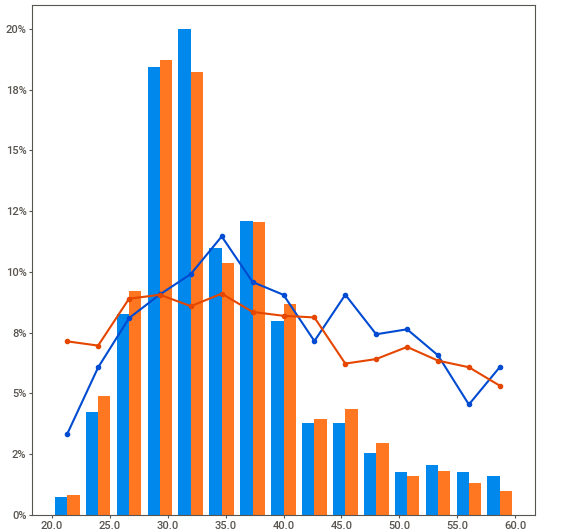
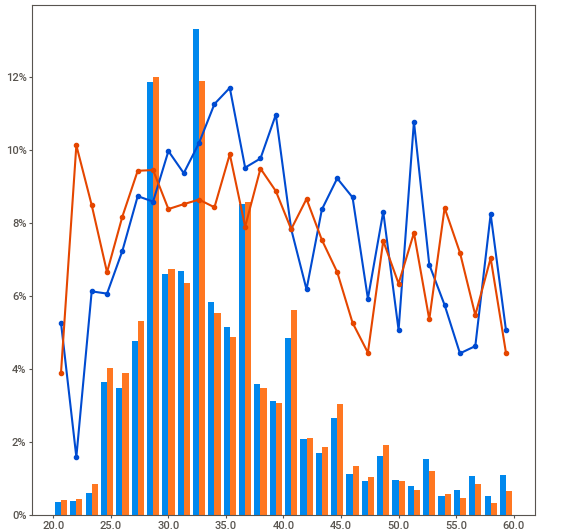
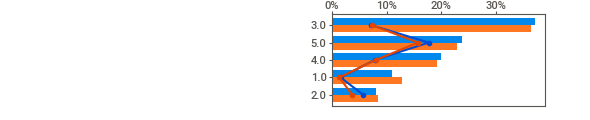
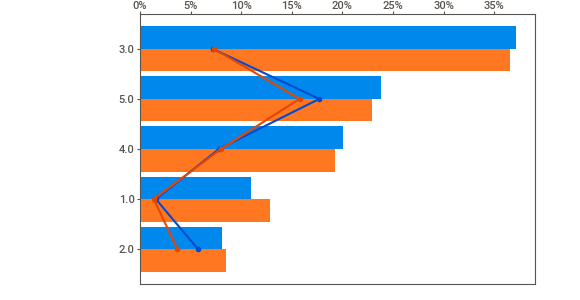
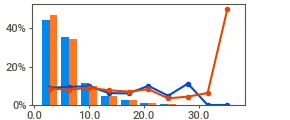
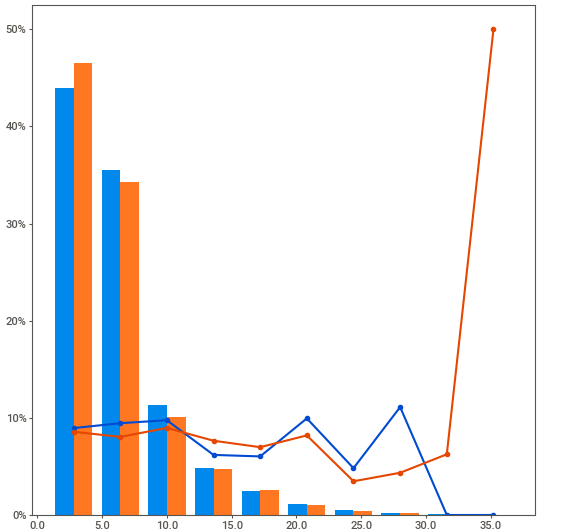
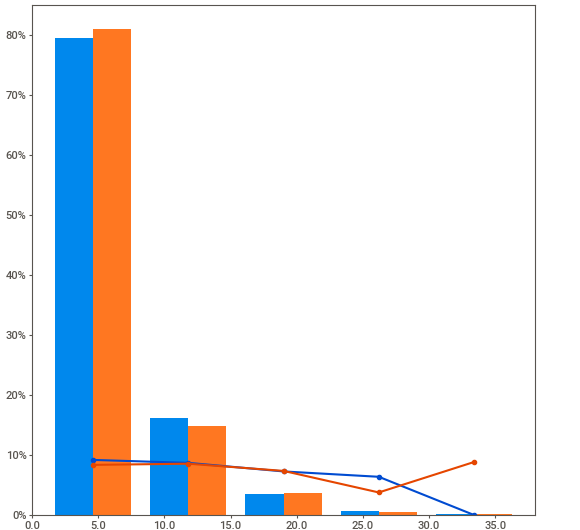
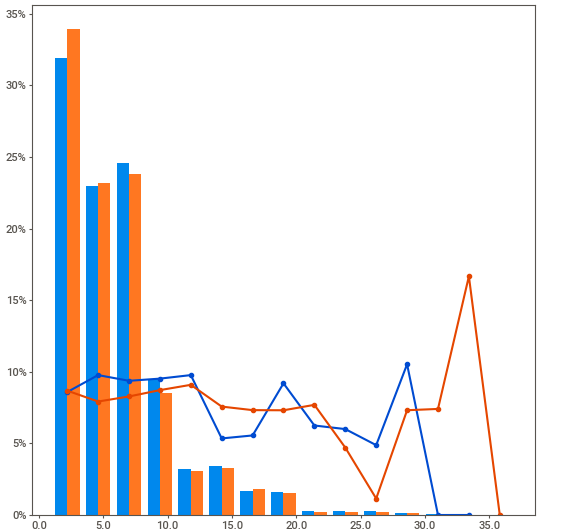
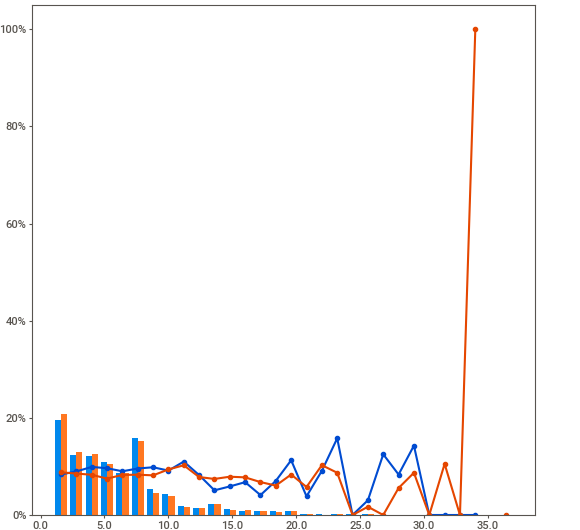
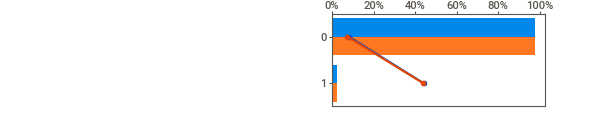
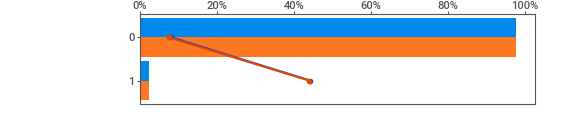
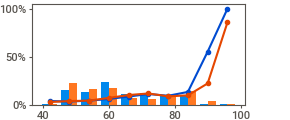
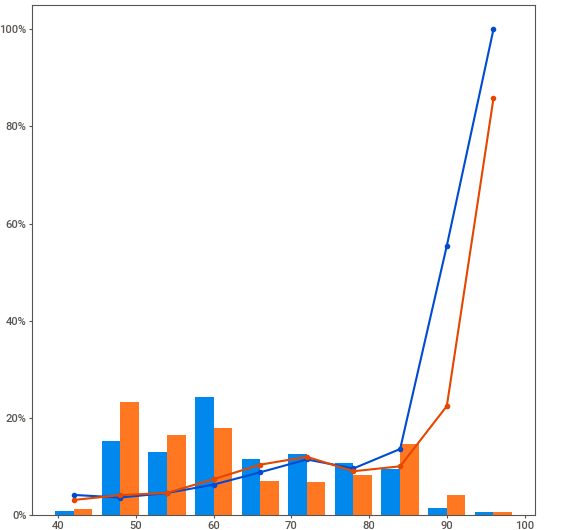
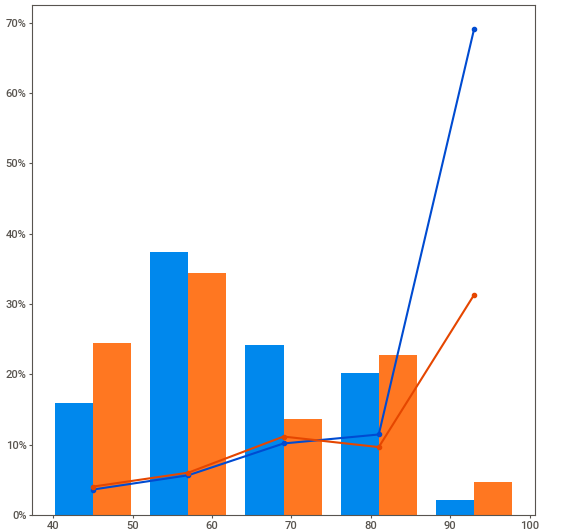
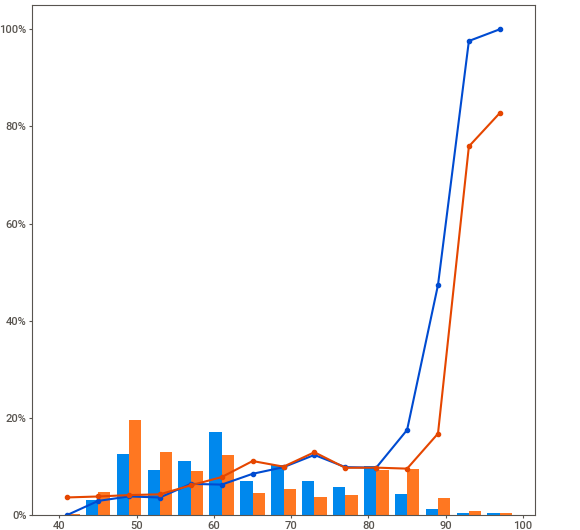
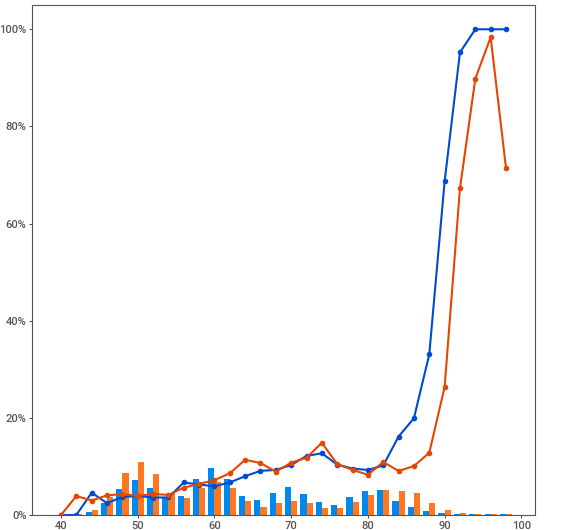
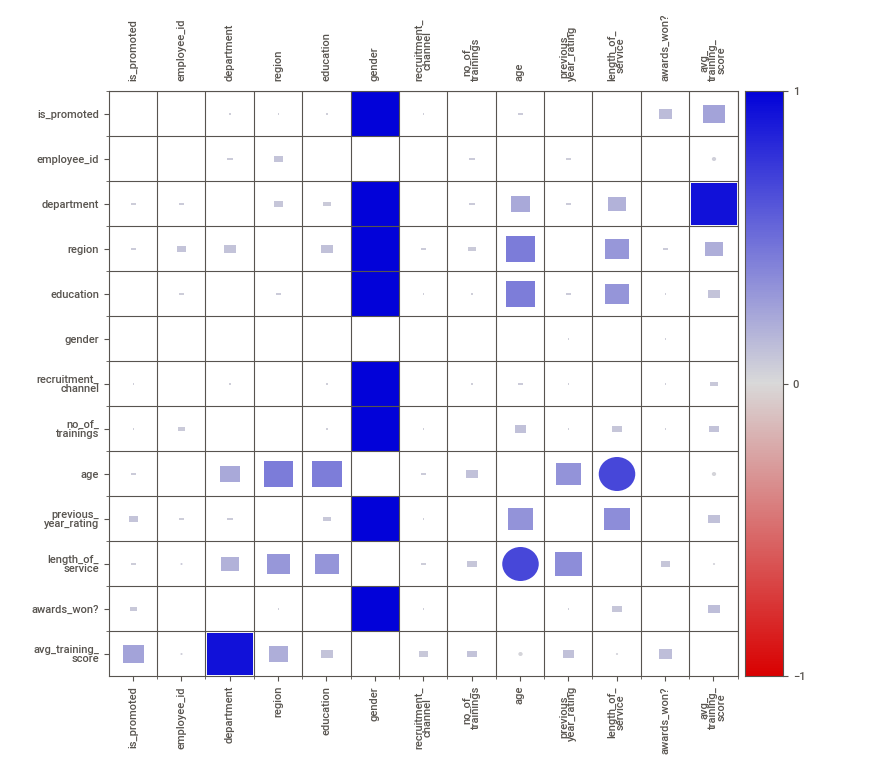
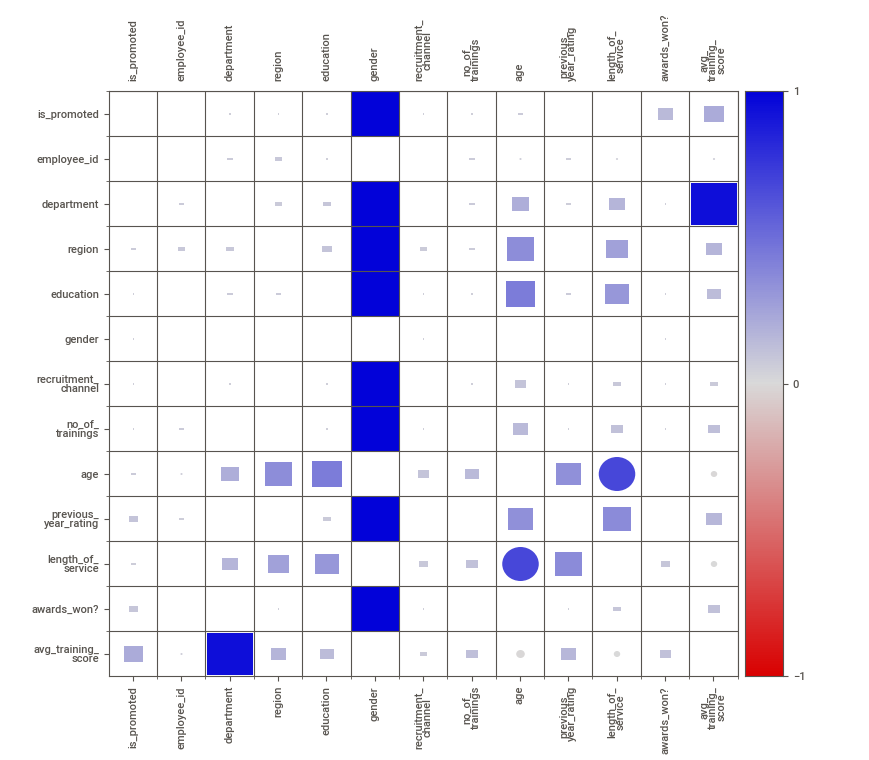

In [7]:
import sweetviz as sv

# Comparamos 'f' vs 'm' (mujeres vs hombres) usando una condición booleana
sweetv_compare_intra = sv.compare_intra(
    info,
    condition_series=info['gender'] == 'f',
    target_feat='is_promoted',
    names=['Hombre', 'Mujer']
)

# Mostrar el reporte en el notebook
sweetv_compare_intra.show_notebook()


4. Elimina los registros con información faltante (`NaN`) y la columna `employee_id` por no tener aportación en la predicción.

In [ ]:
# Elimina faltantes
# Eliminar registros con NaN en education o 'previous_year_rating
info = info.dropna(subset=['education', 'previous_year_rating'])

In [ ]:
# Elimina la columna employee_id
info= info.drop(columns='employee_id')
info

department     region         education gender  \
0      Sales & Marketing   region_7  Master's & above      f   
1             Operations  region_22        Bachelor's      m   
2      Sales & Marketing  region_19        Bachelor's      m   
3      Sales & Marketing  region_23        Bachelor's      m   
4             Technology  region_26        Bachelor's      m   
...                  ...        ...               ...    ...   
54802  Sales & Marketing  region_14        Bachelor's      m   
54803         Technology  region_14        Bachelor's      m   
54804         Operations  region_27  Master's & above      f   
54805          Analytics   region_1        Bachelor's      m   
54807                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
0                sourcing                1   35                   5.0   
1                   other                1   30                   5.0   
2                sourcing                1   34                   3.0   
3                   other                2   39                   1.0   
4                   other                1   45                   3.0   
...                   ...              ...  ...                   ...   
54802               other                2   31                   1.0   
54803            sourcing                1   48                   3.0   
54804               other                1   37                   2.0   
54805               other                1   27                   5.0   
54807               other                1   27                   1.0   

       length_of_service  awards_won?  avg_training_score  is_promoted  
0                      8            0                  49            0  
1                      4            0                  60            0  
2                      7            0                  50            0  
3                     10            0                  50            0  
4                      2            0                  73            0  
...                  ...          ...                 ...          ...  
54802                  2            0                  49            0  
54803                 17            0                  78            0  
54804                  6            0                  56            0  
54805                  3            0                  79            0  
54807                  5            0                  49            0  

[48660 rows x 12 columns]

5. Codifica las variables categóricas de info con `LabelEncoder`.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Codifica las variables categóricas
from sklearn.preprocessing import LabelEncoder

# Copiamos el DataFrame limpio
info_encoded = info.copy()

# Identificar columnas categóricas
cat_cols = info_encoded.select_dtypes(include='object').columns

# Aplicar LabelEncoder a cada columna categórica
for col in cat_cols:
    le = LabelEncoder()
    info_encoded[col] = le.fit_transform(info_encoded[col])

6. Divide la matriz en conjuntos de entrenamiento y prueba (80:20), utilizando el parámetro `random_state=1` para garantizar reproducibilidad.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Divide el conjunto dataframe info para obtener: train y test

# Separar variables predictoras y variable objetivo
X = info_encoded.drop(columns='is_promoted')
y = info_encoded['is_promoted']

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)


7. Observa la distribución de la variable objetivo `is_promoted`. En caso de que las clases estén desbalanceadas, ejecuta `over_sampling` con el método `SMOTE()`.

In [ ]:
# Observa la distribución
print("Distribución original:")
print(y_train.value_counts(normalize=True).round(3))

Distribución original:
is_promoted
0    0.913
1    0.087
Name: proportion, dtype: float64


In [ ]:
from imblearn.over_sampling import SMOTE

# 1. Inicializar el objeto SMOTE
smote = SMOTE(random_state=1)

# 2. Aplicar oversampling solo al conjunto de entrenamiento
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 3. Mostrar la nueva distribución de clases
print("Distribución después de aplicar SMOTE:")
print(y_train_res.value_counts(normalize=True).round(3))


Distribución después de aplicar SMOTE:
is_promoted
0    0.5
1    0.5
Name: proportion, dtype: float64


8. Configura el autoaprendizaje de PyCaret asegurándote de usar `preprocess=False` para no aplicar ninguna operación adicional al conjunto.

In [ ]:
from pycaret.classification import *

In [ ]:
# Configura y ejecuta el autoaprendizaje
from pycaret.classification import setup, compare_models

# 1. Unir X_train_res y y_train_res en un solo DataFrame
df_pycaret = X_train_res.copy()
df_pycaret['is_promoted'] = y_train_res

# 2. Inicializar PyCaret sin preprocesamiento
setup(
    data=df_pycaret,
    target='is_promoted',
    preprocess=False,
    verbose=True,
    session_id=1
)


9. Optimiza el mejor modelo `tune_model()` con la métrica `accuracy`.

In [ ]:
# Optimiza el mejor modelo
from pycaret.classification import tune_model

# Ya tienes best_model desde compare_models()
# Ahora lo optimizas con la métrica de accuracy
# 3. Comparar modelos automáticamente
best_model = compare_models()
tuned_model = tune_model(best_model, optimize='Accuracy')


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


10. Utiliza `evaluate_model()` para mostrar la interfaz de usuario con detalles del modelo optimizado y verifica las métricas `predict_model() `con el conjunto de prueba.

In [ ]:
# Detalles del modelo
from pycaret.classification import evaluate_model, predict_model

# 1. Mostrar interfaz de evaluación del modelo optimizado
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
print(predictions.columns)

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'awards_won?', 'avg_training_score', 'is_promoted', 'prediction_label',
       'prediction_score'],
      dtype='object')


In [ ]:
# Verifica las métricas

# 2. Preparar el conjunto de prueba en el mismo formato que PyCaret espera
df_test = X_test.copy()
df_test['is_promoted'] = y_test  # añadir la variable objetivo


# 3. Predecir usando el modelo optimizado
predictions = predict_model(tuned_model, data=df_test)
# Mostrar predicciones reales vs predichas con score
print(predictions[['is_promoted', 'prediction_label', 'prediction_score']].head())

# 4. Ver resultados
# Calcular métricas de desempeño
from sklearn.metrics import classification_report

print("\nReporte de clasificación:")
print(classification_report(predictions['is_promoted'], predictions['prediction_label']))

       is_promoted  prediction_label  prediction_score
35377            0                 0             0.950
52532            0                 0             0.990
29470            0                 1             0.880
21740            0                 0             0.990
15769            0                 0             0.985

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      8876
           1       0.43      0.32      0.37       856

    accuracy                           0.90      9732
   macro avg       0.68      0.64      0.66      9732
weighted avg       0.89      0.90      0.90      9732

